# Title analyses

In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns


In [2]:
df = pd.read_csv("table_1_eligible.csv", index_col=[0]) #it reads table derived from medline file

In [3]:
df.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [4]:
titles = df[["Journal", "Title", "Year"]]

In [5]:
titles.head(5)

,Journal,Title,Year
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018


# Species extraction

In [6]:
import re
#acrescentei [A-Z] na frente do sp. nov,pq tinham gêneros sem espécie7
titles["species"] = titles["Title"].str.findall('[A-Z]\w+ [a-z]\w+ (?:sp\. nov|sp\.nov)|[A-Z]\w+ (?:sp\. nov|sp\.nov)|[A-Z]\w+ [a-z]\w+ (?:gen\. nov|gen\.nov)|[A-Z]. \w+ (?:sp\. nov|sp\.nov)') #tenta primeiro duas palavras antes do padrão, depois uma

titles.to_csv("species.txt") #Some species presented wrong names in the database


/home/fernando/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
titles
titles["species"].to_csv("lista_species.csv")

In [8]:
#the code below permits verifying species names that are repeated
from  itertools import chain
from collections import Counter

species = pd.Series(list(chain.from_iterable(titles["species"])))
freq_species = species.value_counts()
freq_species.to_csv("freq_species.csv") #it contains errors


In [9]:
freq_species.head(30)

Burkholderia humi sp. nov                2
Streptomyces mangrovi sp. nov            2
Chitinophaga terrae sp. nov              2
Cronobacter muytjensii sp. nov           2
Sphingomonas ginsengisoli sp. nov        2
Lysobacter humi sp. nov                  2
Novosphingobium aquaticum sp. nov        2
Nocardioides soli sp. nov                2
Mycobacterium sherrisii sp. nov          2
Mycobacterium shigaense sp. nov          2
Aeromonas sharmana sp. nov               2
Flavobacterium aquaticum sp. nov         2
Borrelia carolinensis sp. nov            2
Cronobacter turicensis sp. nov           2
Cronobacter dublinensis sp. nov          2
Aeromonas aquariorum sp. nov             2
Sphingomonas aeria sp. nov               2
Agromyces mangrovi sp. nov               2
Pseudomonas furukawaii sp. nov           2
Jeotgalibacillus soli sp. nov            2
Paenibacillus beijingensis sp. nov       2
Deinococcus soli sp. nov                 2
Glaciimonas alpina sp. nov               2
Streptococc

# Genera count - corrected table

In [10]:
freq_species_ncorr_df = pd.read_csv("freq_species_curated.csv") #loading table with corrected species names
freq_species_ncorr_df.head(3)


,Name,Freq,Obs
0,Acidovorax oryzae sp. Nov,1,abbreviated
1,Amycolatopsis tolypomycina sp. nov,1,abbreviated
2,Amycolatopsis vancoresmycina sp. nov,1,abbreviated


In [11]:
freq_species_ncorr_df.info() #number of names (10800)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10798 entries, 0 to 10797
Data columns (total 3 columns):
Name    10798 non-null object
Freq    10798 non-null int64
Obs     68 non-null object
dtypes: int64(1), object(2)
memory usage: 253.2+ KB


In [12]:
freq_species_ncorr_df["Genus"] = freq_species_ncorr_df["Name"].str.split(" ").apply(lambda x: x[0])
freq_species_ncorr_df.head(3)

,Name,Freq,Obs,Genus
0,Acidovorax oryzae sp. Nov,1,abbreviated,Acidovorax
1,Amycolatopsis tolypomycina sp. nov,1,abbreviated,Amycolatopsis
2,Amycolatopsis vancoresmycina sp. nov,1,abbreviated,Amycolatopsis


In [13]:
freq_species_ncorr_df["Genus"].value_counts().to_csv("genera_counts.csv") #total number of genera (2442), some species are repeated

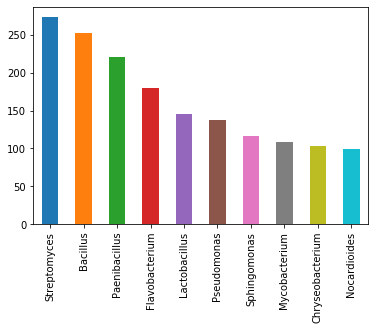

In [14]:
freq_species_ncorr_df["Genus"].value_counts().head(10).plot(kind="bar")

In [15]:
freq_species_ncorr_df["Genus"].value_counts().head(10).to_csv("generos.txt")

In [16]:
top_genera = pd.DataFrame(freq_species_ncorr_df["Genus"].value_counts().head(10)).reset_index()
top_genera

,index,Genus
0,Streptomyces,273
1,Bacillus,252
2,Paenibacillus,220
3,Flavobacterium,180
4,Lactobacillus,145
5,Pseudomonas,137
6,Sphingomonas,116
7,Mycobacterium,109
8,Chryseobacterium,103
9,Nocardioides,99


In [17]:
top_genera.columns = ["Genus", "Frequency"]

In [18]:
top_genera

,Genus,Frequency
0,Streptomyces,273
1,Bacillus,252
2,Paenibacillus,220
3,Flavobacterium,180
4,Lactobacillus,145
5,Pseudomonas,137
6,Sphingomonas,116
7,Mycobacterium,109
8,Chryseobacterium,103
9,Nocardioides,99


# Figure 5 - Genus 

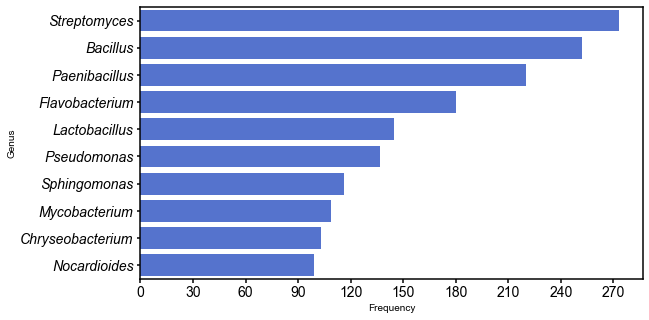

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(9,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
ax.set_yticklabels(top_genera["Genus"], fontstyle='italic') 
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.barplot(x='Frequency', y='Genus', data=top_genera, color="royalblue") #palette=pal
fig.savefig('genus.svg', format='svg', dpi=600)

# Attributing genera to phyla

In [20]:
filos = pd.read_csv("bac_lineages_ed3.csv")

In [21]:
filos.columns = ["phylum", "Genus"]

In [22]:
filos.head(3)

,phylum,Genus
0,Abawacabacteria,NaN
1,Abditibacteriota,NaN
2,Abditibacteriota,Abditibacterium


In [23]:
genus_counts = pd.DataFrame(freq_species_ncorr_df["Genus"].value_counts()).reset_index()
genus_counts.columns = ["Genus", "Frequency"]
genus_counts.to_csv("genus_counts.csv")

In [24]:
filo_genus = pd.merge(genus_counts, filos, on="Genus")

In [25]:
filo_genus.to_csv("filo_genus.csv")

In [26]:
filo_counts = pd.DataFrame(filo_genus.groupby("phylum")["Frequency"].sum())

In [27]:
filo_counts["Frequency"].sum()

10796

In [28]:
filo_counts.sort_values(by="Frequency", ascending=False)

,Frequency
phylum,
Proteobacteria,4335
Actinobacteria,2392
Firmicutes,1868
Bacteroidetes,1703
Deinococcus-Thermus,86
Spirochaetes,55
Acidobacteria,46
Verrucomicrobia,45
Chloroflexi,34


In [29]:
top_filo = filo_counts.sort_values(by="Frequency", ascending=False).head(5)

# Figure 5 - Phylum

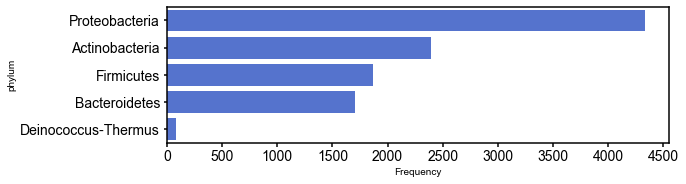

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(9,2.5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.barplot(x='Frequency', y=top_filo.index, data=top_filo, color="royalblue")
fig.savefig('filo.svg', format='svg', dpi=600)

# Checking differences between phylum table and the genus table

In [31]:
merged = genus_counts.merge(filos, on="Genus", indicator=True, how="outer")
sem_filo = merged[merged['_merge'] == 'left_only'] #3 without phylum
sem_filo.to_csv("sem_filo.csv")

# Wordcloud from titles

In [32]:
titles

,Journal,Title,Year,species
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,[Leucothrix arctica sp. nov]
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,[Hyphobacterium indicum sp. nov]
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,[Sphingopyxis lindanitolerans sp. nov]
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,"[Mesosutterella multiformis gen. nov, Sutterel..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,[Acinetobacter sichuanensis sp. nov]
7,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",2018,[Enterobacter sichuanensis sp. nov]
8,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",2018,[Kribbella monticola sp. nov]
9,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",2018,[Halomonas litopenaei sp. nov]
10,International journal of systematic and evolut...,"Alsobacter soli sp. nov., a novel bacterium is...",2018,[Alsobacter soli sp. nov]
11,International journal of systematic and evolut...,"Microbacterium halophytorum sp. nov., a novel ...",2018,[Microbacterium halophytorum sp. nov]


In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from collections import Counter

only_titles = titles["Title"]
titles_cat = only_titles.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
titles_no_punct = titles_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(titles_no_punct.lower()) 

words_no_stops = [] 
for w in word_tokens:
    if w not in stop_words:
        words_no_stops.append(w)

In [34]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline


In [35]:
words_no_stops

['leucothrix',
 'arctica',
 'sp',
 'nov',
 'isolated',
 'arctic',
 'seawater',
 'hyphobacterium',
 'indicum',
 'sp',
 'nov',
 'isolated',
 'deep',
 'seawater',
 'emended',
 'description',
 'genus',
 'hyphobacterium',
 'sphingopyxis',
 'lindanitolerans',
 'sp',
 'nov',
 'strain',
 'ws5a3pt',
 'enriched',
 'pesticide',
 'disposal',
 'site',
 'mesosutterella',
 'multiformis',
 'gen',
 'nov',
 'sp',
 'nov',
 'member',
 'family',
 'sutterellaceae',
 'sutterella',
 'megalosphaeroides',
 'sp',
 'nov',
 'isolated',
 'human',
 'faeces',
 'acinetobacter',
 'sichuanensis',
 'sp',
 'nov',
 'recovered',
 'hospital',
 'sewage',
 'china',
 'enterobacter',
 'sichuanensis',
 'sp',
 'nov',
 'recovered',
 'human',
 'urine',
 'kribbella',
 'monticola',
 'sp',
 'nov',
 'novel',
 'actinomycete',
 'isolated',
 'soil',
 'halomonas',
 'litopenaei',
 'sp',
 'nov',
 'moderately',
 'halophilic',
 'exopolysaccharide-producing',
 'bacterium',
 'isolated',
 'shrimp',
 'hatchery',
 'alsobacter',
 'soli',
 'sp',
 'nov

In [36]:
undesirable_words = ["comb","sp", "nov", "gen", "bacterium", "bacteria", "descriptions", "emended", "isolated", "genus", "novel", "member", "description", "member", "family", "species", "proposal", "et", "al", "new"]

filtered_words = [] 
for w in words_no_stops:
    if w not in undesirable_words:
        filtered_words.append(w)

In [37]:
filtered_words

['leucothrix',
 'arctica',
 'arctic',
 'seawater',
 'hyphobacterium',
 'indicum',
 'deep',
 'seawater',
 'hyphobacterium',
 'sphingopyxis',
 'lindanitolerans',
 'strain',
 'ws5a3pt',
 'enriched',
 'pesticide',
 'disposal',
 'site',
 'mesosutterella',
 'multiformis',
 'sutterellaceae',
 'sutterella',
 'megalosphaeroides',
 'human',
 'faeces',
 'acinetobacter',
 'sichuanensis',
 'recovered',
 'hospital',
 'sewage',
 'china',
 'enterobacter',
 'sichuanensis',
 'recovered',
 'human',
 'urine',
 'kribbella',
 'monticola',
 'actinomycete',
 'soil',
 'halomonas',
 'litopenaei',
 'moderately',
 'halophilic',
 'exopolysaccharide-producing',
 'shrimp',
 'hatchery',
 'alsobacter',
 'soli',
 'paddy',
 'soil',
 'alsobacter',
 'alsobacteraceae',
 'fam',
 'microbacterium',
 'halophytorum',
 'endophytic',
 'actinobacterium',
 'halophytes',
 'salinimonas',
 'sediminis',
 'piezophilic',
 'deep-sea',
 'sediment',
 'sample',
 'britain',
 'trench',
 'nocardioides',
 'houyundeii',
 'tibetan',
 'antelope',
 

In [38]:
import numpy as np

#x, y = np.ogrid[:300, :300]

#mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
#mask = 255 * mask.astype(int)

#mask = np.array(Image.open("bac_icon.png"))

# Figure 10

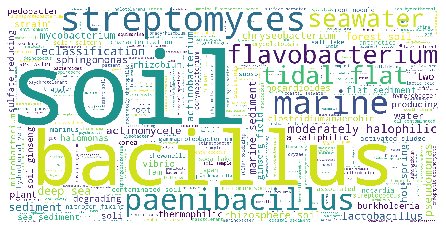

In [39]:
# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1000, max_words=300, background_color="white").generate(" ".join(filtered_words))
#wordcloud = WordCloud(width=28, height=22, max_words=300, background_color="white", mask=mask).generate(" ".join(filtered_words))

# Display the generated image:
#plt.figure(figsize=[14,11])
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud,interpolation="none")
plt.savefig("wordcloud.png", dpi=600, interpolation='none')

# Wordcloud from abstracts

In [40]:
only_abstracts = df["Abstract"]
abstracts_cat = only_abstracts.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
abstracts_no_punct = abstracts_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens_abstracts = word_tokenize(abstracts_no_punct.lower()) 

words_no_stops_abstracts = [] 
for w in word_tokens_abstracts:
    if w not in stop_words:
        words_no_stops_abstracts.append(w)

In [41]:
undesirable_words = ["dsm", "type", "strain", "comb", "sp", "nov", "gen", "bacterium", "bacteria", "descriptions", "emended", "isolated", "genus", "novel", "member", "description", "member", "family", "species", "proposal", "et", "al", "new"]

filtered_words_abstracts = [] 
for w in words_no_stops_abstracts:
    if w not in undesirable_words:
        filtered_words_abstracts.append(w)

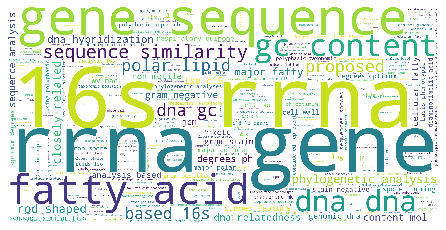

In [42]:
# Create and generate a word cloud image:
wordcloud_abstracts = WordCloud(width=2000, height=1000, max_words=300, background_color="white").generate(" ".join(filtered_words_abstracts))
#wordcloud = WordCloud(width=28, height=22, max_words=300, background_color="white", mask=mask).generate(" ".join(filtered_words))

# Display the generated image:
#plt.figure(figsize=[14,11])
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud_abstracts,interpolation="none")
plt.savefig("wordcloud_abstracts.png", dpi=600, interpolation='none')